<br/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="left"/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="right"/>
<div align="center">
<h2>Bootcamp Data Science - Módulo 1</h2><br/>
<h1>Inferencia Estadística</h1>
<br/><br/>
    <b>Instructor Principal:</b> Patricio Olivares polivares@codingdojo.la <br/>
    <b>Instructor Asistente:</b> Daniela Blanco dblanco@codingdojo.la<br/><br/>
    <b>Coding Dojo</b>

</div>

# Tipos de errores

Para determinar el correcto funcionamiento de un algoritmo de clasificación, podemos preguntarnos

- *¿Cuántas veces acertamos la clasificación de una clase y cuántas veces no?*

Los errores que puede cometer nuestro clasificador son de dos tipos:

## Errores de Tipo 1: Falso Positivo

Clasificamos un elemento como *perteneciente* (positivo) a la clase **incorrectamente** (falso)

<img src="images/un5.jpeg" alt="" width="300px" align="center"/>

## Errores de Tipo 2: Falso Negativo

Clasificamos un elemento como *no perteneciente* (negativo) a la clase **incorrectamente** (falso)

<img src="images/noUn5.jpeg" alt="" width="300px" align="center"/>

# Matriz de confusión

Permite contar la cantidad de veces que instancias de la clase A son clasificadas como clase B

<img src="images/matrizConfusion.png" alt="" width="700px" align="center"/>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow", O'Reilly

## Ejemplo

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Primera vez que se importa la biblioteca de aprendizaje automático scikit-learn
# No te preocupes si esto parece mucho código
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ten en cuenta que es probable que el nombre del archivo sea diferente en tu computadora (especialmente más adelante en el curso)
filename = 'data/titanic.csv'
df = pd.read_csv(filename)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Transforma la columna Sexo en una forma que no sea de texto
# Elijo cuatro funciones, podrías haber elegido otras
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex']
# Convierta la columna Sexo en algo que pueda alimentar a un modelo
# Tiene
df['Sex'] = df.Sex.map({'male': 0, 
                        'female': 1})
# Eliminar filas donde la edad es nan del conjunto de datos
df = df.loc[~df['Age'].isnull(), :]
# Crear matriz de características y vector objetivo
X = df.loc[:, feature_cols]
y = df['Survived']
# Divida los datos en conjuntos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0)
# Estandarizar datos
scaler = StandardScaler()
# Ajusta solo en el conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar transformación tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Crea una instancia de un modelo
logreg = LogisticRegression()
# Entrena el modelo con los datos
logreg.fit(X_train, y_train);
# predicciones de clase (no probabilidades predichas)
predictions = logreg.predict(X_test)
print(predictions)
print(y_test.tolist())

[1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0]


In [3]:
# valores reales: y_test.values
# predicciones: predicciones del modelo
print("Total de elementos:", len(y_test.values))
cm = metrics.confusion_matrix(y_test.values, predictions)
print(cm)
print(cm.ravel()) # ravel() es una función que, a partir de una matriz de datos, me entrega los valores como si fuera una única lista
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

Total de elementos: 179
[[87 16]
 [17 59]]
[87 16 17 59]
87 16 17 59


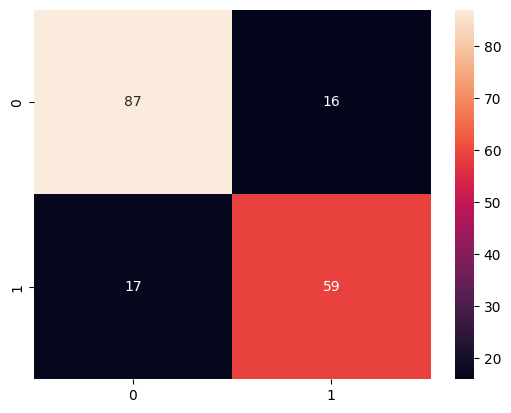

In [6]:
# Mostrando gráficamente la matriz de confusión
import seaborn as sns

f = sns.heatmap(cm, annot=True)

In [9]:
# También es posible graficar la matriz de confusión a partir del clasificador
# Los parámetros de entrada son: el clasificador, las características de entrada 
# y tu columna objetivo

# TODO: función deprecada (ya no se utiliza), borrar
metrics.plot_confusion_matrix(logreg, X_test, y_test.values)

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

# Accuracy (exactitud)

- Fracción de casos correctamente clasificados sobre casos totales (¿Cuántas veces acerté?)

$$ \text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

- En nuestra matriz de confusión anterior, sería

$$\text{accuracy} = \frac{59+87}{59 + 87 + 16 + 17} = 0.8156 = 81.56\%$$

In [4]:
score = logreg.score(X_test, y_test) # Esta línea, para este modelo, calcula el accuracy
print("Score obtenido por Regresor", score)
manual_score = (tp + tn)/(tp + tn + fp + fn)
print("Score obtenido manualmente", manual_score)

Score obtenido por Regresor 0.8156424581005587
Score obtenido manualmente 0.8156424581005587


In [11]:
# Ej. Modelo de clasificación de 5s
import numpy as np
datos = [1,2,1,3,4,2,5,3,4,6,5,4,2,7,9,8,9,6,4,5]
valores_reales = [0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1]

# Creando el modelo "Nada es 5"
# Emularemos las predicciones de este modelo que clasifica todo como
# "No 5" en la siguiente variable
predicciones = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] # Crea una lista de 0s
print(predicciones)
print(valores_reales)
# # Nuestro modelo clasifica todo como NO 5
tn=17 # 17 son los números que no eran 5, por lo tanto nuestro modelo los clasifico bien
tp=0 # Como no clasificamos ningún 5, los TP son
fn=3 # Los 5s que clasificamos incorrectamente, están acá
fp=0 # No hicimos ninguna clasificación FP.

accuracy = (tn+tp)/(tn+tp+fn+fp)
print(accuracy*100)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
85.0


In [10]:
# Ej. Modelo de clasificación de 5s
import numpy as np
datos = [1,2,1,3,4,2,5,5,5,5,5,5,5,5,8,5,5,5,5,5]
valores_reales = [0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1]

# Este sería el modelo contrario, clasifica "Todo como 5"
predicciones = np.ones(20) # Crea una lista de 0s
print(predicciones)
print(valores_reales)
# Nuestro modelo clasifica todo como NO 5
tn=0 # 17 son los números que no eran 5, por lo tanto nuestro modelo los clasifico bien
tp=14 # Como no clasificamos ningún 5, los TP son
fn=0 # Los 5s que clasificamos incorrectamente, están acá
fp=6 # No hicimos ninguna claisificación FP.

accuracy = (tn+tp)/(tn+tp+fn+fp)
print(accuracy*100)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
70.0


El accuracy es una excelente medida, pero que se basa en un supuesto:Los datos positivos y negativos deben ser **COMPARABLES** en cantidad, lo cual no siempre ocurre.

# Sensitivity/Recall/True Positive Rate (sensibilidad)

- Fracción de casos **pertenecientes** a una clase correctamente clasificados (¿Cuántas veces acerté al clasificar la clase X?)

$$ \text{sensitivity} = \frac{TP}{TP + FN} = \frac{\text{Positivos correctamente clasificados}}{\text{Positivos reales totales}} $$

In [12]:
# Ahora, calculemos la sensibilidad de nuestro modelo de
# No 5s
sensitivity = tp/(tp+fn)
print(sensitivity*100)

0.0


# Specificity/Selectivity/True Negative Rate (especificidad)

- Fracción de casos **no pertenecientes** a una clase correctamente clasificados (¿Cuántas veces acerté al clasificar casos fuera de la clase X?)

$$ \text{specificity} = \frac{TN}{TN + FP} $$

In [13]:
# Calculemos ahora la especificidad de nuestro modelo
# No 5s
specificity = (tn)/(tn + fp)
print(specificity*100)

100.0


# Precision/Positive predictions (precisión)

- Fracción de casos clasificados como **positivos** que fueron correctamente clasificados (¿Cuántos casos clasificados como X fueron acertados?)

$$ \text{precision} = \frac{TP}{TP + FP} = \frac{\text{Casos correctamente clasificados}}{\text{Casos totales clasificados como Positivos}} $$

In [14]:
# Calculemos la precision de nuestro modelo
# No 5s
precision = tp/(tp+fp)
print(precision*100)

ZeroDivisionError: division by zero

In [15]:
# Calcular sensibilidad, especificidad y precision
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
#precision = tp / (tp + fp)
print('Sensitivity: {:.3f}'.format(sensitivity))
print('Specificity: {:.3f}'.format(specificity))
#print('Precision: {:.3f}'.format(precision))

Sensitivity: 0.000
Specificity: 1.000


# Muestreo

Selección de un subconjunto de instancias (muestra) a partir de un conjunto de datos

## Muestreo con reemplazo

<img src="images/sampleWithReplacement.png" alt="" width="250px" align="center"/>

## Muestreo sin reemplazo

<img src="images/sampleWithoutReplacement.png" alt="" width="250px" align="center"/>

In [16]:
# TODO: cambiar el código, bost house dataset ya no está disponible en scikit-learn
# NumPy es bueno para ayudar a generar números aleatorios
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
# Código para muestreo con reemplazo
np.random.seed(0)
for _ in range(1, 15):
    samples = np.random.choice(a=15, size=15, replace=True) # Escojo 15 índices
    print(samples, ',Num Samples: ' + str(len(samples)) + ',numberUnique: ' + str(len(set(samples))) )
bootstrappedDF = df.loc[samples, :]
bootstrappedDF

In [ ]:
# Muestreo sin reemplazo
np.random.seed(0)
for _ in range(1, 15):
    samples = np.random.choice(a=15, size=15, replace=False)
    print(samples, ',Num Samples: ' + str(len(samples)) + ',numberUnique: ' + str(len(set(samples))) )
bootstrappedDF = df.loc[samples, :]
bootstrappedDF

In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
#codigo extra, para que imagenes de matplotlib
#estén centradas en las diapositivas, ejecutar antes de lanzar los ejemplos.